---
<h1 align='center' style="color:green">Image Filtering</h1>

---

#### In image filtering, a pixel value is updated using its neighbouring values. But how are these values updated in the first place?

#### Well, there are multiple ways of updating pixel values, such as selecting the maximum value from neighbours, using the average of neighbours, etc. Each method has it’s own uses. For example, averaging the pixel values in a neighbourhood is used for image blurring.
---
<img src="images/if.png">

---
#### Gaussian filtering is also used for image blurring that gives different weights to the neighbouring pixels based on their distance from the pixel under consideration.

#### For image filtering, we use kernels. Kernels are matrices of numbers of different shapes like 3 x 3, 5 x 5, etc. A kernel is used to calculate the dot product with a part of the image. When calculating the new value of a pixel, the kernel center is overlapped with the pixel. The neighbouring pixel values are multiplied with the corresponding values in the kernel. The calculated value is assigned to the pixel coinciding with the center of the kernel.
---

### 1. Import the libraries

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Read the image

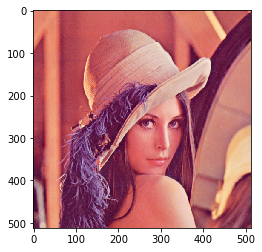

In [2]:
image=cv2.imread("images/Lenna.png")

# original image
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

### 3. using the averaging kernel for image smoothening 

In [16]:
M = np.float32([[1,0,-100],[0,1,-100]]) 
rows,cols = image.shape[:2] 
kernel = np.ones((3,3),np.uint8)
dst = cv2.warpAffine(image,M,(cols,rows)) 

averaging_kernel=np.ones((3,3),np.float32)/9
filtered_image=cv2.filter2D(image,-1,kernel)

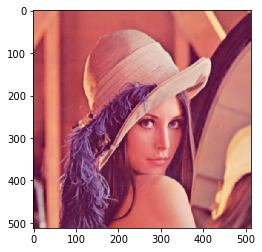

In [14]:
gaussian_kernel_x = cv2.getGaussianKernel(5,1) 
gaussian_kernel_y = cv2.getGaussianKernel(5,1) 
#converting to two dimensional kernel using matrix multiplication 
gaussian_kernel = gaussian_kernel_x * gaussian_kernel_y.T 
#you can also use cv2.GaussianBLurring(image,(shape of kernel),standard deviation) instead of cv2.filter2D 
filtered_image = cv2.filter2D(image,-1,gaussian_kernel) 
plt.imshow(filtered_image)

#### In the above output, the image on the right shows the result of applying Gaussian kernels on an input image. We can see that the edges of the original image are suppressed. The Gaussian kernel with different values of sigma is used extensively to calculate the Difference of Gaussian for our image. 
#### **This is an important step in the feature extraction process because it reduces the noise present in the image.**